# Guia da Camada de Enlace
### IMPORTANDO AS DEPENDÊNCIAS
##### O documento tem o objetivo de demostrar o funcionamento da camada de enlace, além de suas funções e ferramentas

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
Logger.activate(Logger)

##### Instanciando a rede, e setando a topologia.

2024-06-24 15:14:33,377: Qubit 0 adicionado à memória do Host 0.
2024-06-24 15:14:33,382: Qubit 0 criado com fidelidade inicial 0.5213475387576254 e adicionado à memória do Host 0.
2024-06-24 15:14:33,386: Qubit 1 adicionado à memória do Host 0.
2024-06-24 15:14:33,390: Qubit 1 criado com fidelidade inicial 0.3039859810207436 e adicionado à memória do Host 0.
2024-06-24 15:14:33,393: Qubit 2 adicionado à memória do Host 0.
2024-06-24 15:14:33,397: Qubit 2 criado com fidelidade inicial 0.8955891215693339 e adicionado à memória do Host 0.
2024-06-24 15:14:33,400: Qubit 3 adicionado à memória do Host 0.
2024-06-24 15:14:33,404: Qubit 3 criado com fidelidade inicial 0.19588667472697996 e adicionado à memória do Host 0.
2024-06-24 15:14:33,407: Qubit 4 adicionado à memória do Host 0.
2024-06-24 15:14:33,409: Qubit 4 criado com fidelidade inicial 0.4995054830408121 e adicionado à memória do Host 0.
2024-06-24 15:14:33,411: Qubit 5 adicionado à memória do Host 0.
2024-06-24 15:14:33,414: Qubi

2024-06-24 15:14:33,518: Qubit 12 adicionado à memória do Host 0.
2024-06-24 15:14:33,525: Qubit 12 criado com fidelidade inicial 0.7154174780614483 e adicionado à memória do Host 0.
2024-06-24 15:14:33,538: Qubit 13 adicionado à memória do Host 0.
2024-06-24 15:14:33,542: Qubit 13 criado com fidelidade inicial 0.7141415765031915 e adicionado à memória do Host 0.
2024-06-24 15:14:33,546: Qubit 14 adicionado à memória do Host 0.
2024-06-24 15:14:33,549: Qubit 14 criado com fidelidade inicial 0.618323475007846 e adicionado à memória do Host 0.
2024-06-24 15:14:33,561: Qubit 15 adicionado à memória do Host 0.
2024-06-24 15:14:33,572: Qubit 15 criado com fidelidade inicial 0.26371601362530483 e adicionado à memória do Host 0.
2024-06-24 15:14:33,578: Qubit 16 adicionado à memória do Host 0.
2024-06-24 15:14:33,586: Qubit 16 criado com fidelidade inicial 0.16798544312414088 e adicionado à memória do Host 0.
2024-06-24 15:14:33,602: Qubit 17 adicionado à memória do Host 0.
2024-06-24 15:14:3

Hosts inicializados
Canais inicializados


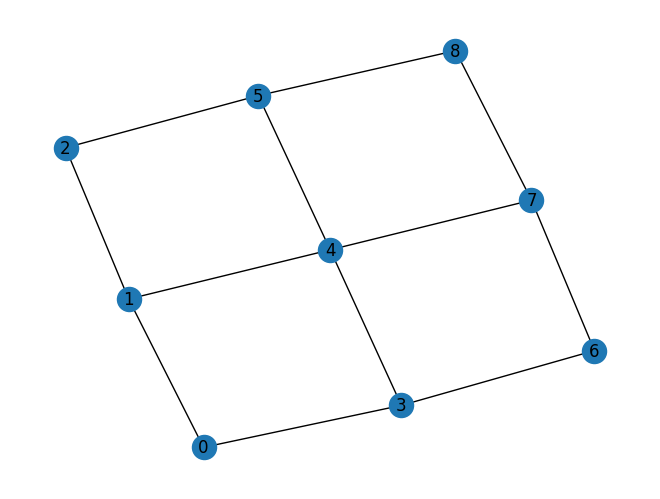

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

##### Definindo os hosts alice e bob nos nós 1 e 2 respectivamente, e definindo os qubits que serão enviados

In [3]:
alice = rede.get_host(1)
bob = rede.get_host(2)
qubit1 = Qubit(1)
qubit2 = Qubit(2)


##### Enviando um request para o servidor, se a fidelidade dos qubits for maior que 0.5, o servidor aceita a conexão e envia a chave para o cliente, se não, é tentado novamente fazer o entrelaçamento, e se falhar novamente, o servidor tenta purificar.

In [4]:
rede.linklayer.request(1,2)

2024-06-24 15:14:38,558: A fidelidade entre o qubit Qubit 39 with state None e o qubit Qubit 59 with state None é 0.7562256479262731
2024-06-24 15:14:38,565: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.
2024-06-24 15:14:38,570: Entrelaçamento falhou entre 1 e 2 na tentativa 1.
2024-06-24 15:14:38,574: Não há EPRs suficientes para purificação no canal (1, 2).
2024-06-24 15:14:38,579: A fidelidade entre o qubit Qubit 38 with state None e o qubit Qubit 58 with state None é 0.27955056978071563
2024-06-24 15:14:38,582: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.
2024-06-24 15:14:38,585: Entrelaçamento falhou entre 1 e 2 na tentativa 2.
2024-06-24 15:14:38,587: Purificação falhou no canal (1, 2) devido a baixa fidelidade após purificação 0.38703040381417225.1


##### Verificando o canal do canal

In [5]:
rede.get_eprs_from_edge(1,2)

[]

##### Verificando todos os canais

In [6]:
rede.get_eprs()

{(0, 3): [],
 (0, 1): [],
 (1, 4): [],
 (1, 2): [],
 (2, 5): [],
 (3, 6): [],
 (3, 4): [],
 (4, 7): [],
 (4, 5): [],
 (5, 8): [],
 (6, 7): [],
 (7, 8): []}